# Import Libraries

In [3]:
# Week 4 — Cell 1: Importing Libraries (Logistic Regression - Classification)

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report
)

sns.set(style="whitegrid", context="notebook")

print("Libraries imported successfully!")


Libraries imported successfully!


# Load Dataset

In [4]:
# Week 4 — Cell 2: Load SpamBase dataset (UCI)

# Fetch SpamBase dataset from OpenML (UCI repository)
spambase = fetch_openml(name="spambase", version=1, as_frame=True)

# Features and target
df = spambase.frame

print("Dataset loaded successfully!")
print("\nShape:", df.shape)

print("\nFirst 5 rows:")
display(df.head())

print("\nDataset Info:")
print(df.info())


Dataset loaded successfully!

Shape: (4601, 58)

First 5 rows:


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   word_freq_make              4601 non-null   float64 
 1   word_freq_address           4601 non-null   float64 
 2   word_freq_all               4601 non-null   float64 
 3   word_freq_3d                4601 non-null   float64 
 4   word_freq_our               4601 non-null   float64 
 5   word_freq_over              4601 non-null   float64 
 6   word_freq_remove            4601 non-null   float64 
 7   word_freq_internet          4601 non-null   float64 
 8   word_freq_order             4601 non-null   float64 
 9   word_freq_mail              4601 non-null   float64 
 10  word_freq_receive           4601 non-null   float64 
 11  word_freq_will              4601 non-null   float64 
 12  word_freq_people            4601 non-null   float64 
 13  wor

# Split Features and Target

In [5]:
# Week 4 — Cell 3: Split features and target

# Features (all columns except target)
X = df.drop(columns=['class'])

# Target (spam = 1, not spam = 0)
y = df['class'].astype(int)

print("Features shape:", X.shape)
print("Target shape:", y.shape)

print("\nTarget distribution:")
print(y.value_counts())


Features shape: (4601, 57)
Target shape: (4601,)

Target distribution:
class
0    2788
1    1813
Name: count, dtype: int64


# Train-Test Split

In [6]:
# Week 4 — Cell 4: Train-test split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

print("Training set shape:")
print(" X_train:", X_train.shape)
print(" y_train:", y_train.shape)

print("\nTesting set shape:")
print(" X_test :", X_test.shape)
print(" y_test :", y_test.shape)


Training set shape:
 X_train: (3450, 57)
 y_train: (3450,)

Testing set shape:
 X_test : (1151, 57)
 y_test : (1151,)


# Logistric Regression Model

In [7]:
# Week 4 — Cell 5: Train Logistic Regression model

# Initialize Logistic Regression model
model = LogisticRegression(max_iter=5000)

# Train the model
model.fit(X_train, y_train)

print("Logistic Regression model trained successfully!")


Logistic Regression model trained successfully!


# Predictions

In [8]:
# Week 4 — Cell 6: Predictions

# Predict class labels on test data
y_pred = model.predict(X_test)

print("Predictions generated successfully!")
print("First 10 predictions:", y_pred[:10])


Predictions generated successfully!
First 10 predictions: [0 0 0 0 0 1 1 1 0 0]


# Accuracy Score

In [9]:
# Week 4 — Cell 7: Accuracy score

accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy * 100:.2f}%")
    

Model Accuracy: 92.79%


# Confusion Matrix

Confusion Matrix:
[[665  32]
 [ 51 403]]


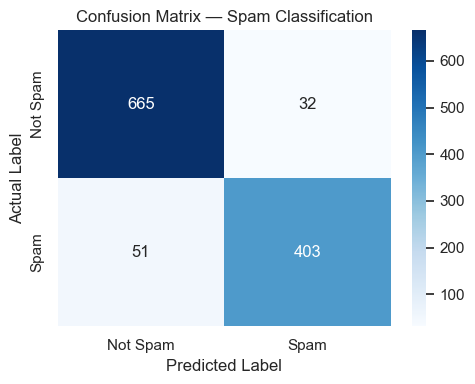

In [10]:
# Week 4 — Cell 8: Confusion Matrix

cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

# Visualize confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Not Spam', 'Spam'],
    yticklabels=['Not Spam', 'Spam']
)

plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix — Spam Classification")
plt.tight_layout()
plt.show()


# Classification Report

In [11]:
# Week 4 — Cell 9: Classification Report

report = classification_report(
    y_test,
    y_pred,
    target_names=['Not Spam', 'Spam']
)

print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

    Not Spam       0.93      0.95      0.94       697
        Spam       0.93      0.89      0.91       454

    accuracy                           0.93      1151
   macro avg       0.93      0.92      0.92      1151
weighted avg       0.93      0.93      0.93      1151

